In [1]:
import yfinance as yf
import pandas as pd

# Download stock data for TCS (India) for the last 5 years
data = yf.download("TCS.NS", start="2019-01-01", end="2024-12-31")

# Save it as a CSV file (optional)
data.to_csv("tcs_stock.csv")

# Display the first few rows
data.head()


C:\Users\AKRIT\AppData\Local\Temp\ipykernel_57060\951574294.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TCS.NS", start="2019-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2019-01-01,1717.571289,1724.070358,1701.503992,1711.433193,1094883
2019-01-02,1736.075806,1746.140317,1715.043907,1719.557181,2100463
2019-01-03,1714.998779,1755.618241,1708.815617,1732.194396,2611668
2019-01-04,1694.147583,1716.127205,1661.787432,1715.044063,4280862
2019-01-07,1713.148560,1722.987519,1697.893671,1707.642387,1856423


In [2]:
# Show basic info
print("Data shape:", data.shape)
print("\nColumn names:", data.columns)
print("\nData types:")
print(data.dtypes)

# Check for any missing values
print("\nMissing values:\n", data.isnull().sum())

# Show last 5 rows to see recent data
data.tail()


Data shape: (1480, 5)

Column names: MultiIndex([( 'Close', 'TCS.NS'),
            (  'High', 'TCS.NS'),
            (   'Low', 'TCS.NS'),
            (  'Open', 'TCS.NS'),
            ('Volume', 'TCS.NS')],
           names=['Price', 'Ticker'])

Data types:
Price   Ticker
Close   TCS.NS    float64
High    TCS.NS    float64
Low     TCS.NS    float64
Open    TCS.NS    float64
Volume  TCS.NS      int64
dtype: object

Missing values:
 Price   Ticker
Close   TCS.NS    0
High    TCS.NS    0
Low     TCS.NS    0
Open    TCS.NS    0
Volume  TCS.NS    0
dtype: int64


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2024-12-23,4097.958984,4155.807385,4055.188855,4139.103153,2195338
2024-12-24,4118.851562,4156.792892,4097.959002,4097.959002,1181886
2024-12-26,4108.602539,4139.004973,4083.028905,4118.851529,1208464
2024-12-27,4104.414062,4120.280532,4087.069359,4102.590812,858100
2024-12-30,4098.451660,4138.363967,4052.330965,4090.765038,1527169


In [3]:
# Flatten the MultiIndex columns
data.columns = [col[0] for col in data.columns]

# Confirm the new column names
print("Fixed column names:", data.columns)


Fixed column names: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


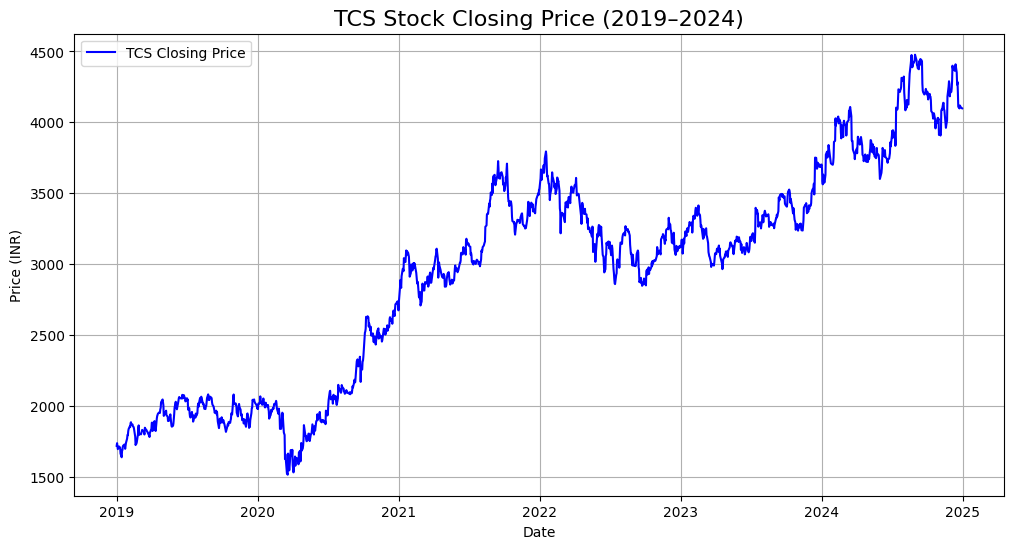

In [4]:
import matplotlib.pyplot as plt

# Plot Closing Price over time
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='TCS Closing Price', color='blue')
plt.title('TCS Stock Closing Price (2019–2024)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price (INR)')
plt.grid(True)
plt.legend()
plt.show()


In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create a new column 'Target' by shifting 'Close' 1 day up
data['Target'] = data['Close'].shift(-1)

# Drop the last row since its target is NaN
data.dropna(inplace=True)

# Use 'Close' as the only feature (reshape required)
X = data[['Close']].values
y = data['Target'].values

# Split into training and testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
predictions = model.predict(X_test)


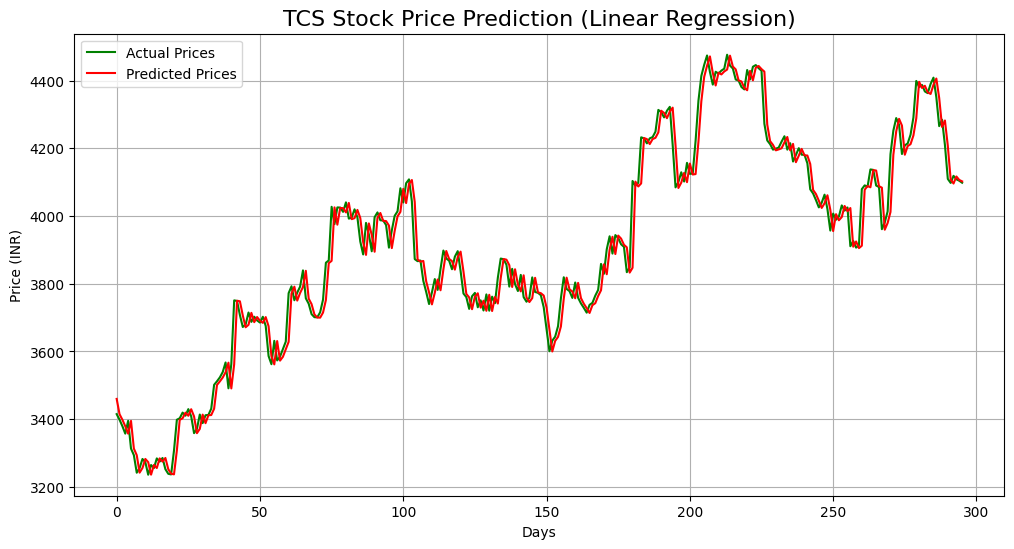

In [6]:
# Plot Actual vs Predicted Closing Prices
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual Prices', color='green')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('TCS Stock Price Prediction (Linear Regression)', fontsize=16)
plt.xlabel('Days')
plt.ylabel('Price (INR)')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Load CSV normally
df = pd.read_csv("tcs_stock.csv")

# Show first few rows and column names
print(df.columns)
df.head()


Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


,Price,Close,High,Low,Open,Volume
0,Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
1,Date,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,1717.5712890625,1724.0703583804143,1701.5039924330265,1711.433193449877,1094883
3,2019-01-02,1736.0758056640625,1746.1403172863108,1715.0439073568036,1719.5571807972162,2100463
4,2019-01-03,1714.998779296875,1755.6182414152106,1708.8156165452192,1732.1943956685743,2611668


In [8]:
df = pd.read_csv("tcs_stock.csv", skiprows=2)
print(df.columns)
df.head()


Index(['Date', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')


,Date,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2019-01-01,1717.571289,1724.070358,1701.503992,1711.433193,1094883
1,2019-01-02,1736.075806,1746.140317,1715.043907,1719.557181,2100463
2,2019-01-03,1714.998779,1755.618241,1708.815617,1732.194396,2611668
3,2019-01-04,1694.147583,1716.127205,1661.787432,1715.044063,4280862
4,2019-01-07,1713.148560,1722.987519,1697.893671,1707.642387,1856423


In [9]:
import pandas as pd

# Read with correct header row
df = pd.read_csv("tcs_stock.csv", skiprows=2)

# Rename columns
df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]

# Convert 'Date' column to datetime and set as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Use only the 'Close' column for now
close_prices = df[['Close']]

# Check final structure
print(close_prices.head())


                  Close
Date                   
2019-01-01  1717.571289
2019-01-02  1736.075806
2019-01-03  1714.998779
2019-01-04  1694.147583
2019-01-07  1713.148560


In [10]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize close prices to range 0–1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Use last 60 days to predict the next day
window_size = 60
X = []
y = []

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i - window_size:i, 0])
    y.append(scaled_data[i, 0])

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Reshape input to LSTM format: [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

print("✅ X shape:", X.shape)
print("✅ y shape:", y.shape)


✅ X shape: (1420, 60, 1)
✅ y shape: (1420,)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))  # Helps prevent overfitting

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=25))
model.add(Dense(units=1))  # Final output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, batch_size=32, epochs=20)

print("✅ Model trained successfully!")


C:\Users\AKRIT\anaconda3\envs\mlenv\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


Epoch 1/20


C:\Users\AKRIT\anaconda3\envs\mlenv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0695
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0053
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0037
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0032
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0027
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0030
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0029
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0024
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0022
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0023
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0022
Epoch 12/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0022
Epoch 13/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0020
Epoch 14/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0019
Epoch 15/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0018
Epoch 16/20
45/

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0899
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0054
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0037
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0034
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0032
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0029
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0025
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0027
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0027
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0025


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("tcs_stock.csv")
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df.set_index("Date", inplace=True)
close_prices = df[['Close']]


In [14]:
import pandas as pd

# Load the file *without assuming* the first row is header
df_raw = pd.read_csv("tcs_stock.csv", header=None)

# Show first few rows
print(df_raw.head(10))

# Print shape and first row to check actual column names
print("\nShape:", df_raw.shape)



            0                   1                   2                   3  \
0       Price               Close                High                 Low   
1      Ticker              TCS.NS              TCS.NS              TCS.NS   
2        Date                 NaN                 NaN                 NaN   
3  2019-01-01     1717.5712890625  1724.0703583804143  1701.5039924330265   
4  2019-01-02  1736.0758056640625  1746.1403172863108  1715.0439073568036   
5  2019-01-03   1714.998779296875  1755.6182414152106  1708.8156165452192   
6  2019-01-04  1694.1475830078125  1716.1272046194636  1661.7874315413405   
7  2019-01-07  1713.1485595703125  1722.9875188853573  1697.8936714786214   
8  2019-01-08  1709.2220458984375  1720.8211380768216  1699.9698341698374   
9  2019-01-09    1703.26416015625  1732.1942859745318   1684.985403360531   

                    4        5  
0                Open   Volume  
1              TCS.NS   TCS.NS  
2                 NaN      NaN  
3   1711.43319344987

In [15]:
import pandas as pd

# Read the CSV, skipping the first 3 junk rows
df = pd.read_csv("tcs_stock.csv", skiprows=3)

# Rename the columns
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert Date to datetime format and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Confirm it's clean now
print(df.head())
print("\n✅ Data cleaned. Columns:", df.columns)


                  Close         High          Low         Open   Volume
Date                                                                   
2019-01-02  1736.075806  1746.140317  1715.043907  1719.557181  2100463
2019-01-03  1714.998779  1755.618241  1708.815617  1732.194396  2611668
2019-01-04  1694.147583  1716.127205  1661.787432  1715.044063  4280862
2019-01-07  1713.148560  1722.987519  1697.893671  1707.642387  1856423
2019-01-08  1709.222046  1720.821138  1699.969834  1719.918483  1691756

✅ Data cleaned. Columns: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [16]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Only using 'Close' for prediction
close_prices = df[['Close']]

# Normalize to range [0,1]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)


In [17]:
X = []
y = []

for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])  # 60 previous days
    y.append(scaled_data[i, 0])       # 61st day (target)

X = np.array(X)
y = np.array(y)

# Reshape to 3D for LSTM input: [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

print("✅ X shape:", X.shape)
print("✅ y shape:", y.shape)


✅ X shape: (1419, 60, 1)
✅ y shape: (1419,)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predicting next closing price

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=20, batch_size=32)


Epoch 1/20


C:\Users\AKRIT\anaconda3\envs\mlenv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0747
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0047
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0037
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0037
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0032
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0033
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0036
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0029
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0029
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0028
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0026
Epoch 12/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0030
Epoch 13/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0025
Epoch 14/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0028
Epoch 15/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0024
Epoch 16/20
45/

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


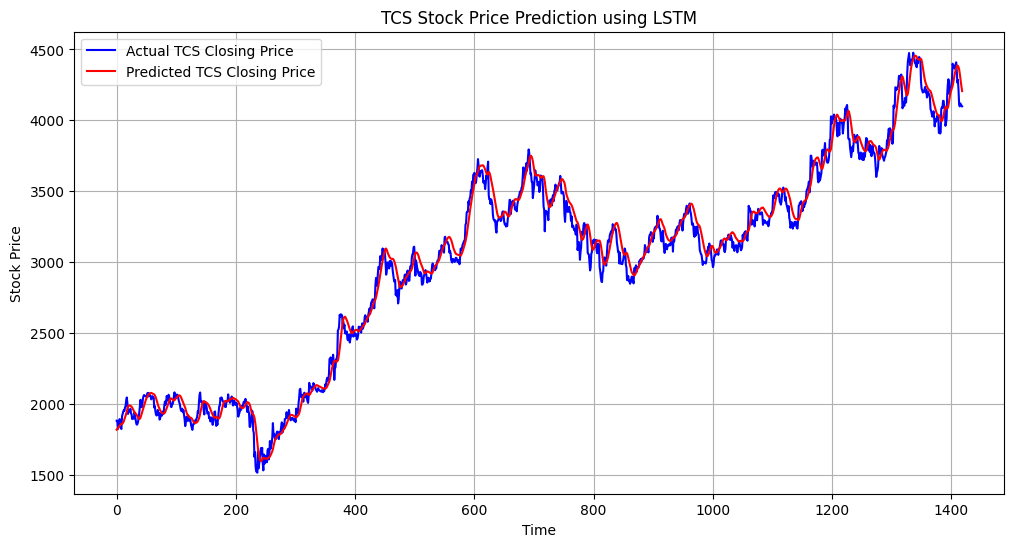

In [19]:
import matplotlib.pyplot as plt

# Predict using the model
predicted = model.predict(X)

# Inverse scale to get actual prices
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(actual_prices, color='blue', label='Actual TCS Closing Price')
plt.plot(predicted_prices, color='red', label='Predicted TCS Closing Price')
plt.title('TCS Stock Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()
